In [12]:
# benjamin_wolcott@brown.edu, wolcottb
# HW 1

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal
%matplotlib inline  

In [13]:
# ODE Integrator Using RK4 Method

def approx_rk4(dt, t_final, R, C, Q0, t0=0.0):
    
    # number of time steps, nust be an integer
    n  = int(t_final/dt) 
    
    #initialize some empty lists to store our data and time steps
    Q_list = []
    t_list = []
    
    # the main loop over all time steps
    for ii in range(n):
        if ii == 0.0:
            # set initial conditions at time zero
            Q = Q0
            t = t0
        else :            
            k1 = -dt*Q
            Q1 = Q + k1/2
            k2 = dt*g(R, C, Q1)
            Q2 = Q + k2/2
            k3 = dt*g(R, C, Q2)
            Q3 = Q + k3
            k4 = dt*g(R, C, Q3)
            
            # update value of Q at each time step and step time by dt
            Q+= (1/6)*(k1 + 2*k2 + 2*k3 + k4)
            t+= dt
            
            
        # use append to add on to the end of a list
        Q_list.append(Q)
        t_list.append(t)
    
    # we turn the lists into numpy arrays before returning
    
    Q_list = np.array(Q_list)
    t_list = np.array(t_list)
    
    return t_list, Q_list


Text(0, 0.5, 'V_out (units)')

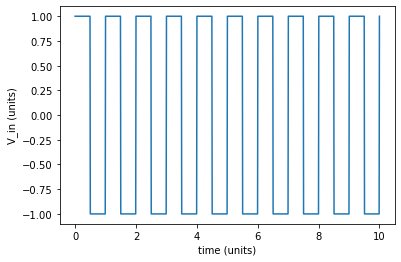

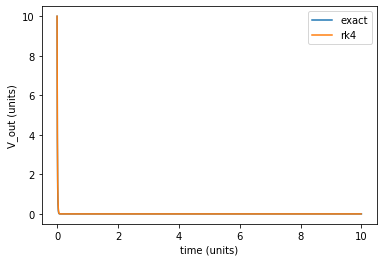

In [26]:
# Problem 1

# Using V_c = V_in*(1 - exp(-t/R/C)) and V_in - V_out - V_c = 0, we get V_out = V_in*exp(-t/R/C)
# and dV_out/dt = (-1/R/C)*V_c

# Use RK4 integrator to solve for square wave input signal

# define exact function and derivative
def exact(t, R, C, V_in, t0 =0.0):
    V_out = V_in*np.exp(-t/R/C)
    return V_out

def g(R, C, V_c):
    g = (-1/R/C)*V_c
    return g

# Define our constants
Q0, t0 = 10, 0.0
t_final, dt = 10, 0.01
R, C = 1, 0.01 

# Define t and V_in
t = np.linspace(t0,t_final,1000) 
V_in = sp.signal.square(t*2*np.pi)
plt.plot(t, V_in)
plt.xlabel("time (units)")
plt.ylabel("V_in (units)")

# Calculate the exact solution
Q_exact = exact(t, R, C, Q0)

#Call our  approximate function, this returns function values and time points 
t_approx4, Q_approx4 = approx_rk4(dt, t_final, R, C, Q0)

# Generate plots 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, Q_exact, linestyle = '-', label = "exact")
ax.plot(t_approx4, Q_approx4, linestyle = '-', label = "rk4")


# plot approximate solution (use discrete points with no connecting line)
ax.plot()

plt.legend()
plt.xlabel("time (units)")
plt.ylabel("V_out (units)")


In [ ]:
# Problem 2

def g_a(N_a, T_a):
    g_a = (-
    return g_a
